In [11]:
include("mode_init/MPAS_Ocean.jl")
include("mode_init/MPAS_OceanHalos.jl")

include("visualization.jl")

In [12]:
mpasOcean = MPAS_Ocean("./MPAS_O_Shallow_Water/Mesh+Initial_Condition+Registry_Files/Periodic",
                        "base_mesh.nc", "mesh.nc", periodicity="Periodic")
mpasOcean.nCells

2500

# Define Initial Condition

In [13]:
include("mode_init/initial_conditions.jl")

planeWaveInit! (generic function with 1 method)

In [14]:
moveArrays!(mpasOcean, Array)

planeWaveInit!(mpasOcean) # could also do gaussianInit!

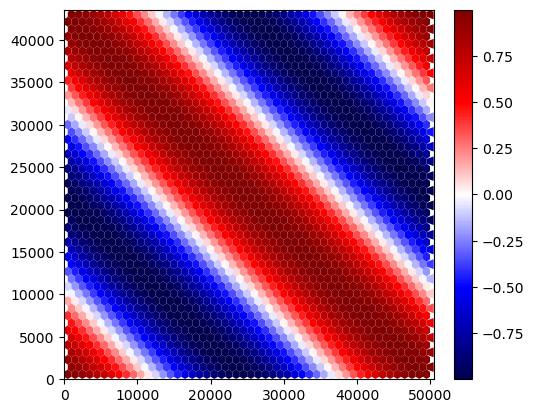

In [16]:
fig, ax, cbar, col = heatMapMesh(mpasOcean, mpasOcean.sshCurrent)
display(fig)

In [20]:
cellsInChunk, edgesInChunk, verticesInChunk, cellsFromChunk, cellsToChunk = divide_ocean(mpasOcean, 3, 4, 4)
cellsInChunk, edgesInChunk, verticesInChunk, cellsFromChunk, cellsToChunk

(Vector{Any}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  654, 655, 656, 657, 658, 659, 660, 661, 662, 663], [14, 15, 16, 17, 18, 19, 20, 21, 22, 23  …  669, 670, 671, 672, 673, 674, 675, 627, 676, 577], [26, 27, 28, 29, 30, 31, 32, 33, 34, 35  …  679, 680, 681, 682, 683, 684, 685, 686, 687, 688], [39, 40, 41, 42, 43, 44, 45, 46, 47, 48  …  694, 695, 696, 697, 698, 699, 700, 651, 602, 552], [601, 602, 603, 604, 605, 606, 607, 608, 609, 610  …  1307, 1308, 1309, 1310, 1311, 1312, 1313, 1215, 1264, 1314], [614, 615, 616, 617, 618, 619, 620, 621, 622, 623  …  1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326], [626, 627, 628, 629, 630, 631, 632, 633, 634, 635  …  1332, 1333, 1334, 1335, 1336, 1337, 1338, 1240, 1289, 1339], [639, 640, 641, 642, 643, 644, 645, 646, 647, 648  …  1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1301], [1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260  …  1907, 1908, 1909, 1910, 1911, 1912, 1913, 1815, 1864, 1914], [1263, 1264, 1265, 1266, 1267, 

In [23]:
regionColorMap = zeros(mpasOcean.nCells)

for iCell in 1:mpasOcean.nCells
    regionColorMap[iCell] = findall((region -> iCell in region), cellsInChunk)[1]
end
    

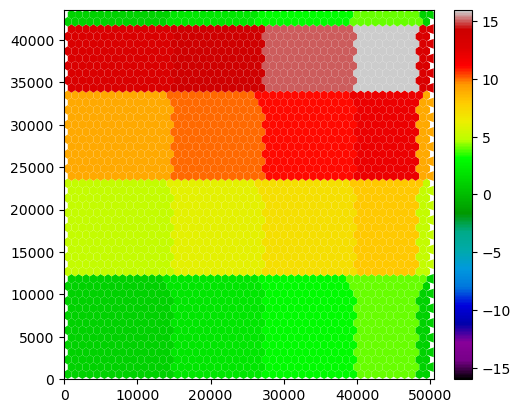

In [25]:
fig, _ = heatMapMesh(mpasOcean, regionColorMap, cmap="nipy_spectral")
display(fig)

In [26]:
region1 = mpas_subset(mpasOcean, cellsInChunk[1], edgesInChunk[1], verticesInChunk[1])

MPAS_Ocean{Float64}([0.9892723329629883, 0.9631625667976582, 0.9218631515885005, 0.8660254037844387, 0.7965299180241964, 0.7144726796328034, 0.6211477802783104, 0.5180270093731303, 0.4067366430758004, 0.28903179694447184  …  -0.6045991148623748, -0.6996633405133652, -0.7836934573258397, -0.8553642601605066, -0.9135454576426008, -0.9573194975320671, -0.9859960370705049, -0.9991228300988584, -0.9964928592495044, -0.9781476007338057], [0.9892723329629883, 0.9631625667976582, 0.9218631515885005, 0.8660254037844387, 0.7965299180241964, 0.7144726796328034, 0.6211477802783104, 0.5180270093731303, 0.4067366430758004, 0.28903179694447184  …  -0.6045991148623748, -0.6996633405133652, -0.7836934573258397, -0.8553642601605066, -0.9135454576426008, -0.9573194975320671, -0.9859960370705049, -0.9991228300988584, -0.9964928592495044, -0.9781476007338057], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

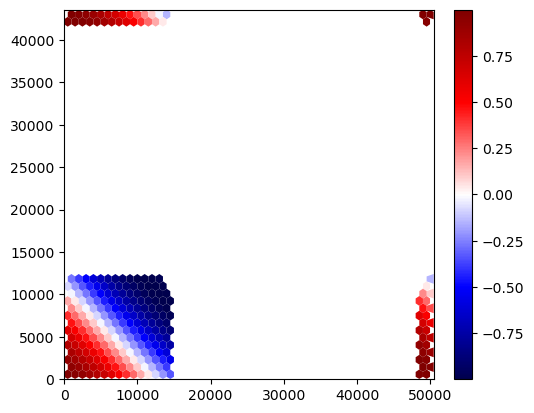

In [29]:
fig, _ = heatMapMesh(region1, region1.sshCurrent)
display(fig)

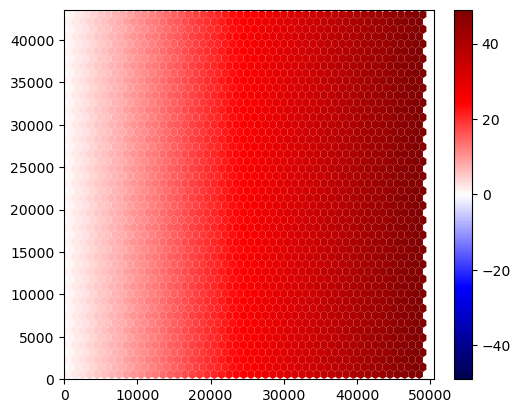

In [47]:
fig, _ = heatMapMesh(mpasOcean, collect(1:mpasOcean.nCells) .%50, cmap="seismic")
display(fig)